# Introduction to Causal Inference

## Milestone 1: Loading and checking the raw discount data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

import graphviz as gr

### Step 1

In [2]:
dataset = pd.read_csv("./non_rand_discount.csv", sep=";")

### Step 2

In [3]:
dataset.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


### Step 3

In [4]:
dataset.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

In [5]:
dataset["discount"] = pd.to_numeric(dataset["discount"].str.split(" ").str[-1])

### Step 4

In [6]:
dataset.isna().mean()

spend_1m_baby            0.000000
spend_2m_baby            0.000000
spend_3m_baby            0.000000
spend_4m_baby            0.000000
spend_5m_baby            0.000000
spend_6m_baby            0.000000
spend_1m_clothes         0.000000
spend_2m_clothes         0.000000
spend_3m_clothes         0.000000
spend_4m_clothes         0.000000
spend_5m_clothes         0.000000
spend_6m_clothes         0.000000
spend_1m_health          0.000000
spend_2m_health          0.000000
spend_3m_health          0.000000
spend_4m_health          0.000000
spend_5m_health          0.000000
spend_6m_health          0.000000
spend_1m_pet             0.000000
spend_2m_pet             0.000000
spend_3m_pet             0.000000
spend_4m_pet             0.000000
spend_5m_pet             0.000000
spend_6m_pet             0.000000
spend_1m_groceries       0.000000
spend_2m_groceries       0.000000
spend_3m_groceries       0.000000
spend_4m_groceries       0.000000
spend_5m_groceries       0.000000
spend_6m_groce

All the data types seem correct. We only have one column which is not numeric, `cust_state`, but that is expected. The treatment variable is `discount`, the outcome primarily `profit`, but we can argue `sales` is also an outcome variable. All the other variables are covariates. There are some missing values in gender, probably from customers that did not wish to report that.

## Milestone 2: Understanding the Treatment Assignment Mechanism

 
The profit equation of this company is:
 
$
Profit_i = Sales_i * 5\% - Discount_i
$
 
Now, let's see how discount is correlated with both of these variables. We won't make any causal statements for now.

### Step 1

<AxesSubplot:xlabel='discount', ylabel='sales'>

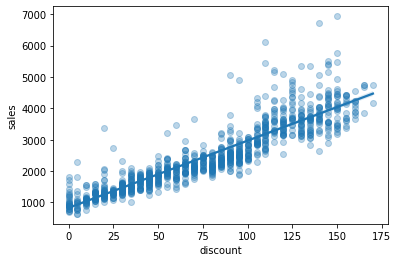

In [7]:
sns.regplot(data = dataset.sample(1000), x="discount", y="sales", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='discount', ylabel='profit'>

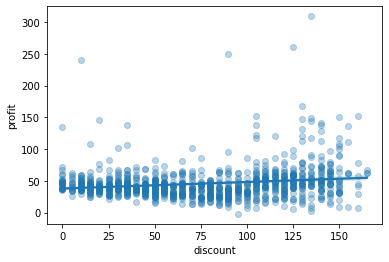

In [8]:
sns.regplot(data = dataset.sample(1000), x="discount", y="profit", scatter_kws={"alpha":0.3})

There seems to be a positive correlation between discount and dales and between discount and profit. But we can't make any causal statement yet. For that, we need to check if customers with low discount levels are comparable to those with high discount levels. If that's not the case, it could be that the correlation is spurious. For instance, it could be that those that get more discounts already spend more in the first place, even if they didn't get the discount. 
 
### Step 2
 
Let's look for any fundamental difference between those customers that have high discount and those that have low discount. Ideally, they should be comparable, as if in a randomized trial. In other words, customers that receive low discount should be similar to those that received high discount, except for their discount level. 

<AxesSubplot:xlabel='tenure', ylabel='discount'>

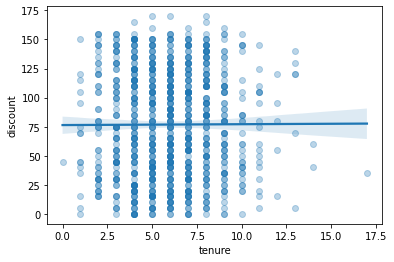

In [9]:
sns.regplot(data = dataset.sample(1000), x="tenure", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='age', ylabel='discount'>

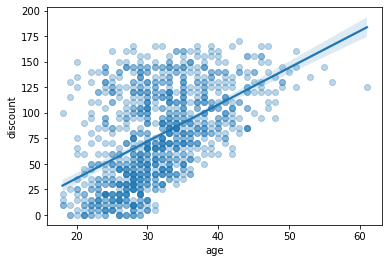

In [10]:
sns.regplot(data = dataset.sample(1000), x="age", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='spend_4m_groceries', ylabel='discount'>

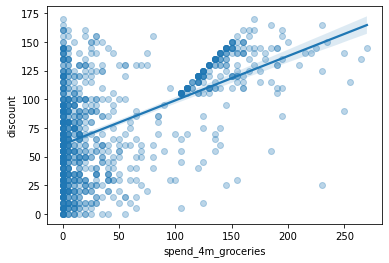

In [11]:
sns.regplot(data = dataset.sample(1000), x="spend_4m_groceries", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='sales_prediction', ylabel='discount'>

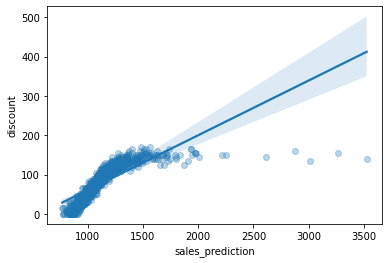

In [12]:
sns.regplot(data = dataset.sample(1000), x="sales_prediction", y="discount", scatter_kws={"alpha":0.3})

<AxesSubplot:xlabel='cust_state', ylabel='discount'>

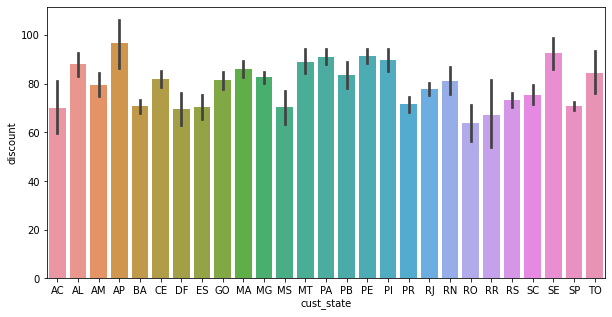

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data = dataset.sort_values("cust_state"), x="cust_state", y="discount")

### Step 3

<AxesSubplot:xlabel='discount', ylabel='profit'>

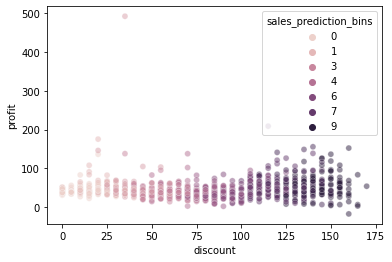

In [14]:
sns.scatterplot(data = dataset.sample(1000), x="discount", y="profit", hue="sales_prediction_bins", alpha=0.5)

### Step 4

As we can see, the higher the age, the higher the discount level. Also, the higher the `sales_prediction`, the higher the discount level. This indicates that the company was giving more discounts to those that it predicted to spend more. That's problematic for our causal statements. It means that those with a high discount would have bought more even without the discount. In potential outcome terms
 
$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
 
that is, those with high discount levels, had they received a low discount level (potential outcome 0) would still generate more profit that those that received a low discount level.

 
## Milestone 3: Confounding Bias

Let's do the same analysis as before, but instead of using plots, let's use linear.

### Step 1

In [15]:
model = smf.ols("sales~discount", data=dataset).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,804.5246,7.790,103.274,0.000,789.255,819.794
discount,21.9248,0.087,251.815,0.000,21.754,22.095


In [16]:
model = smf.ols("profit~discount", data=dataset).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.4217,0.382,103.274,0.000,38.673,40.170
discount,0.0743,0.004,17.419,0.000,0.066,0.083


### Step 2

Nothing new here. Once again, we conclude that discount is positively correlated with sales, with a confidence very far away from zero (21.754, 22.095), meaning this relationship is statistically significant. We expect each unit increase in discount to be associated with a 21.9 sales increase, on average. As for discount, again, the relationship is statistically significant, but much smaller. We expect each unit increase in discount to be associated with a 0.07 increase in profit, on average. 

In [17]:
model = smf.ols("discount~sales_prediction+age", data=dataset).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-102.3049,1.299,-78.761,0.000,-104.851,-99.759
sales_prediction,0.1011,0.001,119.864,0.000,0.099,0.103
age,2.1037,0.038,55.864,0.000,2.030,2.178


### Step 3
As for how the other variables affect discounts, it looks like both `sales_prediction` and `age` are associated with an increase in discount. For instance, if we increase age in one unit **while holding sales_prediction constant**, we expect discounts to increase in 2.1 units, on average.

### Step 4
 
From earlier, we know that
 
$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
 
This means that customers that got high discount levels would have generated more profits than customers that got low discount levels, even if they didn't get high discount levels. In other words, customers that got high discounts are not comparable to those that got low discounts. Therefore, we cannot interpret the relationship we saw earlier between discount and profits as causal, because there is confounding bias.
 
Specifically, we can argue that `sales_prediction` is a confounder because we expect to cause the treatment (the higher the sales prediction, the higher the discount) and the outcome (the higher the sales prediction, the higher the outcome). The direction of this bias is probably negative, since
 
$$
BIAS = E[Profit_0|Discount=High] - E[Profit_0|Discount=Low]
$$


### Step 5
 
Confounders are variables that cause both the treatment and the outcome. We can't check for the existence of confounders just by looking at the data, but we can leverage our intuition about how the world works. For instance, if we know from previous steps that the higher the age, the higher the discount. We also know that older customers tend to have more money than younger ones. Hence, the higher the age, the higher the income and, probably, the higher the sales and profit. Age is thus a possible confounder because it causes discounts to go up and sales to go up. Another potential confounder is sales predictions. So, the higher the sales prediction, the higher the discount and also the higher de sales and profit. Hence, sales prediction is probably a confounder. 
 
If we were to plot the causal graph with age, sales prediction, discount and profit, we would probably have something like this:

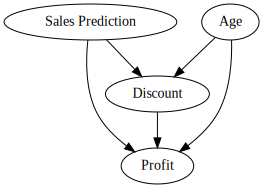

In [18]:
g = gr.Digraph()

g.edge("Sales Prediction", "Discount")
g.edge("Age", "Discount")
g.edge("Age", "Profit")
g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g

I could also draw an arrow from age to sales prediction, because it is probably a good predictor of sales, but that wouldn't change our bias structure much. The main point here is that those with high discount levels would have spend more and generated more profits even if they had a low discount level.

## Milestone 4: Regression Adjustment

### Step 1

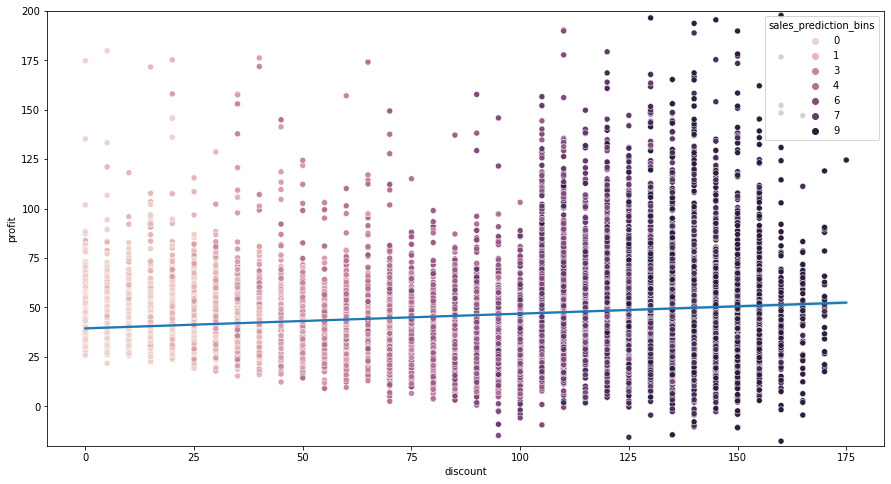

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=dataset, x="discount", y="profit", hue="sales_prediction_bins")
sns.regplot(data=dataset, x="discount", y="profit", scatter=False)
plt.ylim(-20, 200);

### Step 2

In [20]:
model_discount = smf.ols("discount~C(sales_prediction_bins)", data=dataset).fit()

df_discount_res = (dataset
                   .assign(discount_res = model_discount.resid + dataset["discount"].mean()))

### Step 3

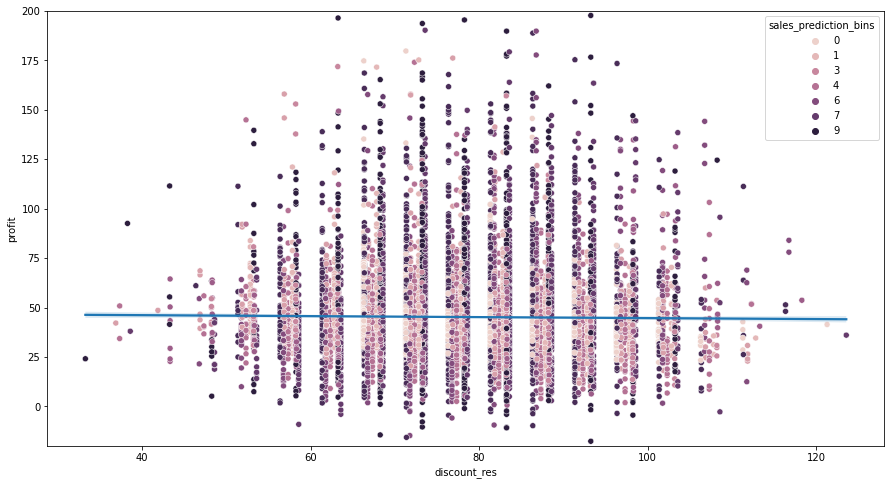

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_discount_res, x="discount_res", y="profit", hue="sales_prediction_bins")
sns.regplot(data=df_discount_res, x="discount_res", y="profit", scatter=False)
plt.ylim(-20, 200);

Once we fit the model to predict discount from sales prediction, get its residuals and plot it against profit we can see that the bias vanishes. It is no longer the case that customers with higher sales predictions have higher discounts (residuals). In other words, looking at the residuals, it is as if discounts were randomly assigned. Also, looking at the plot, we can see that the line is now downward sloping, telling us that the higher the discount, the lower the profit. This residual regression is what we call the debiasing step in FWL theorem. 

### Step 4

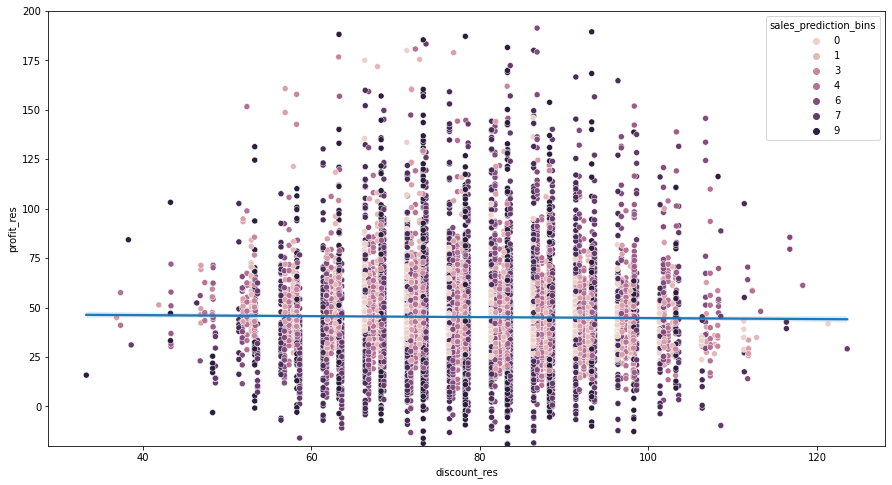

In [22]:
model_profit = smf.ols("profit~C(sales_prediction_bins)", data=df_discount_res).fit()

df_profit_res = (df_discount_res
                 .assign(profit_res = model_profit.resid + df_discount_res["profit"].mean()))

plt.figure(figsize=(15,8))
sns.scatterplot(data=df_profit_res, x="discount_res", y="profit_res", hue="sales_prediction_bins")
sns.regplot(data=df_profit_res, x="discount_res", y="profit_res", scatter=False)
plt.ylim(-20, 200);

Building a model to predict profit from sales prediction and getting its residuals should not change the slope of the line, but it should reduce the variance in the outcome variable profit. It's very hard to see that here, but if we estimate both's variances, we can see it.

In [23]:
df_profit_res["profit_res"].var(), df_profit_res["profit"].var()

(512.5731256022952, 545.4015163032518)

This second residual regression is called the denoising step in FWL theorem.
 
### Step 5

In [24]:
model = smf.ols("profit_res~discount_res", data=df_profit_res).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,47.1222,1.325,35.556,0.000,44.524,49.720
discount_res,-0.0247,0.017,-1.464,0.143,-0.058,0.008


Regressing the residuals of profit on the residuals of discount gives us an estimate about how much we expect profit to increase on average for every unit increase in discount **while holding X** fixed, where X is the set of variables used to get the residuals (`sales_prediction_bins` in our case).  We can see that this coefficient is now negative. We can interpret it like this: while holding sales prediction constant, increasing discount in 1 unit should **decrease** profit by 0.0247. We can interpret this as a causal parameter because we know that `sales_prediction_bins` is the only variable used to determine the discount customer's received. That is, `sales_prediction_bins` is the only confounder and we've adjusted for it. 
 

### Step 6

In [25]:
model = smf.ols("profit~discount + C(sales_prediction_bins)", data=dataset).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.1995,0.616,73.397,0.000,43.992,46.407
C(sales_prediction_bins)[T.1],0.3418,0.858,0.399,0.690,-1.339,2.023
C(sales_prediction_bins)[T.2],-1.7348,0.964,-1.799,0.072,-3.625,0.156
C(sales_prediction_bins)[T.3],-3.5352,1.102,-3.209,0.001,-5.694,-1.376
C(sales_prediction_bins)[T.4],-4.9727,1.294,-3.842,0.000,-7.510,-2.436
C(sales_prediction_bins)[T.5],-5.4330,1.484,-3.661,0.000,-8.342,-2.524
C(sales_prediction_bins)[T.6],0.9766,1.723,0.567,0.571,-2.400,4.353
C(sales_prediction_bins)[T.7],9.7498,1.921,5.075,0.000,5.984,13.515
C(sales_prediction_bins)[T.8],11.9732,2.187,5.475,0.000,7.687,16.260
C(sales_prediction_bins)[T.9],11.8579,2.393,4.954,0.000,7.167,16.549


Running two different regression models, getting the residuals and running a third regression of the residuals is numerically equivalent to running a multiple linear regression. The reason we did it in steps was twofold: first, to understand what regression is doing under the hood, second, because we will use this linear regression breakdown once we get to double/debiases ML. 
 
Another thing you might notice is that the 95% Confidence Interval of the discount parameter contains zero, so we could argue that the effect is not statistically significant. However, if we add some predictive variables to our model we can reduce some variance, which increases the significance of the discount parameter by a lot.

In [26]:
model = smf.ols("profit~discount + C(sales_prediction_bins) + age", data=dataset).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.0247,0.972,6.200,0.000,4.120,7.929
C(sales_prediction_bins)[T.1],-3.3510,0.798,-4.200,0.000,-4.915,-1.787
C(sales_prediction_bins)[T.2],-7.7562,0.901,-8.604,0.000,-9.523,-5.989
C(sales_prediction_bins)[T.3],-12.1335,1.035,-11.724,0.000,-14.162,-10.105
C(sales_prediction_bins)[T.4],-15.4909,1.217,-12.725,0.000,-17.877,-13.105
C(sales_prediction_bins)[T.5],-17.2340,1.395,-12.355,0.000,-19.968,-14.500
C(sales_prediction_bins)[T.6],-11.4120,1.615,-7.066,0.000,-14.578,-8.246
C(sales_prediction_bins)[T.7],-3.1408,1.798,-1.747,0.081,-6.666,0.384
C(sales_prediction_bins)[T.8],-1.1977,2.043,-0.586,0.558,-5.202,2.807
C(sales_prediction_bins)[T.9],0.3677,2.229,0.165,0.869,-4.001,4.737


### Step 7

Based on what we've found, it looks like disocunt is reducing profits. AT first, it looked like discounts and profits were positivly linked. But that was only do to confounding bias. Once we controled for sales prediction we've essentially removed the arrow in our graph that goes from sales prediction to discount

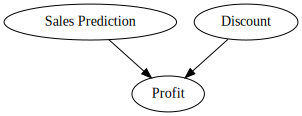

In [27]:
g = gr.Digraph()


g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g

After we've done that, the relationship between discount and profits becomes negative, meaning that discount causes it to go down. Hence, we should recommend the e-commerce company to stop giving discounts or to at least think about a better discount strategy that isn't sacrificing profits. 